In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/4. covid_19_data.csv")

In [4]:
# Checking for null values
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

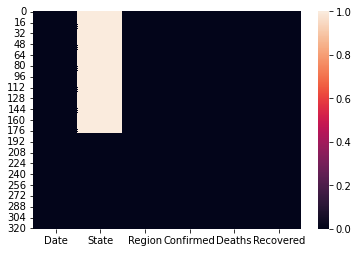

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
# Finding the number of confirmed, death, and recovered cases in each of the regions.
df.groupby('Region').sum().head(10)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [13]:
# Checking by cases.
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False)

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

In [15]:
df.groupby('Region')['Confirmed', 'Recovered'].sum().head(10)

<ipython-input-15-86a0aad07461>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Confirmed', 'Recovered'].sum().head(10)


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
Antigua and Barbuda,24,11
Argentina,4285,1192
Armenia,1932,900
Australia,6752,5715


In [19]:
# Removing cases where confirmed cases are less than 10
df[df.Confirmed < 10]
df = df[~(df.Confirmed < 10)]

In [23]:
# Which region had the most number of confirmed cases?
df.groupby('Region').Confirmed.sum().sort_values(ascending = False)

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Suriname           10
Gambia             10
Holy See           10
Name: Confirmed, Length: 180, dtype: int64

In [32]:
# The region with the least amount of death cases.
df.groupby('Region').Deaths.sum().sort_values(ascending = True).head(30)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

In [34]:
# Number of total cases reported from Kenya
df[df.Region == 'Kenya']

,Date,State,Region,Confirmed,Deaths,Recovered
86,4/29/2020,NaN,Kenya,384,15,129


In [37]:
# Sorting the entire data with respect to confirmed cases in ascending order
df.sort_values( by = ['Confirmed'], ascending = True).head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
256,4/29/2020,Montserrat,UK,11,1,2
144,4/29/2020,NaN,Seychelles,11,0,6
27,4/29/2020,NaN,Burundi,11,1,4
306,4/29/2020,Turks and Caicos Islands,UK,12,1,5
118,4/29/2020,NaN,Nicaragua,13,3,7


In [39]:
# Sorting the data set with respect to the recovered cases number in descending order.
df.sort_values( by = ['Recovered'], ascending = False).head(15)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600
78,4/29/2020,NaN,Ireland,20253,1190,13386
